<a href="https://colab.research.google.com/github/ShivaniR-portfolio/Codsoft/blob/main/Task_2_Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

Importing datasets

In [ ]:
data=pd.read_csv("/content/archive (2).zip")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Data cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Data visualization

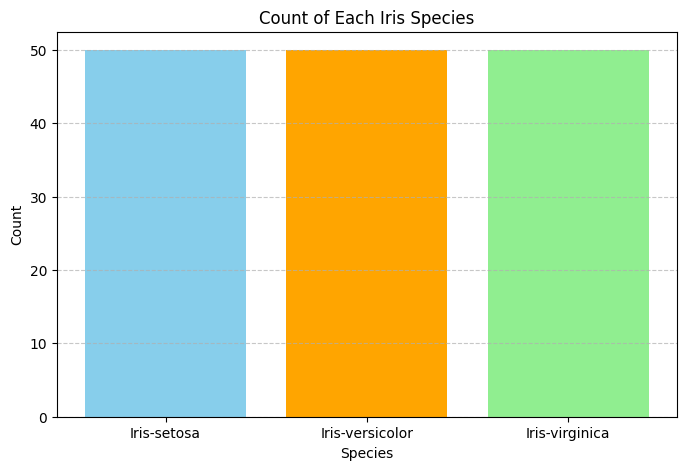

In [ ]:
species_counts = data['species'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(species_counts.index, species_counts.values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Count of Each Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

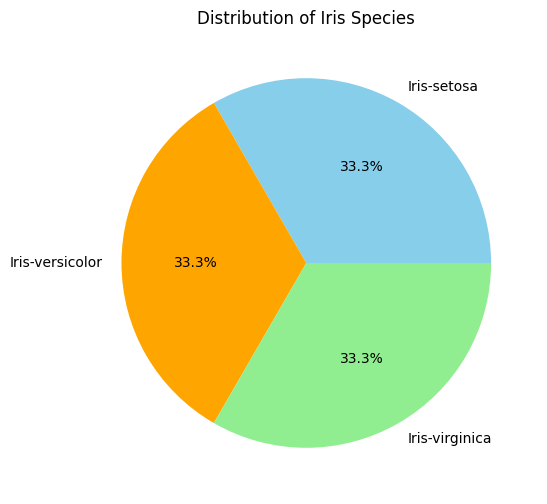

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
plt.title('Distribution of Iris Species')
plt.show()

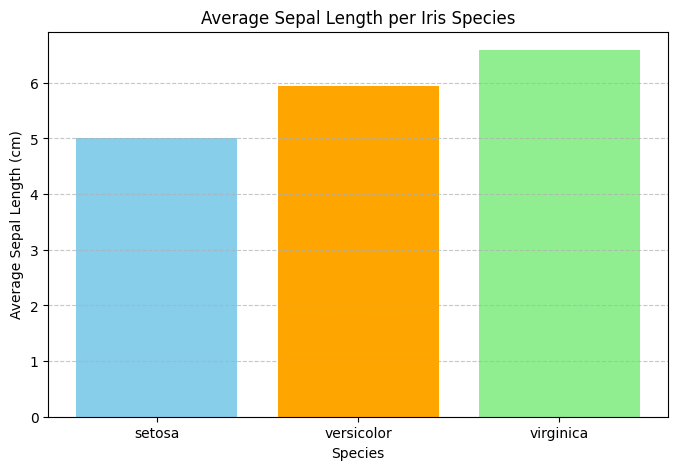

In [ ]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

avg_sepal_length = data.groupby('species')['sepal length (cm)'].mean()
plt.figure(figsize=(8, 5))
plt.bar(avg_sepal_length.index, avg_sepal_length.values, color=['skyblue', 'orange', 'lightgreen'])
plt.title('Average Sepal Length per Iris Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

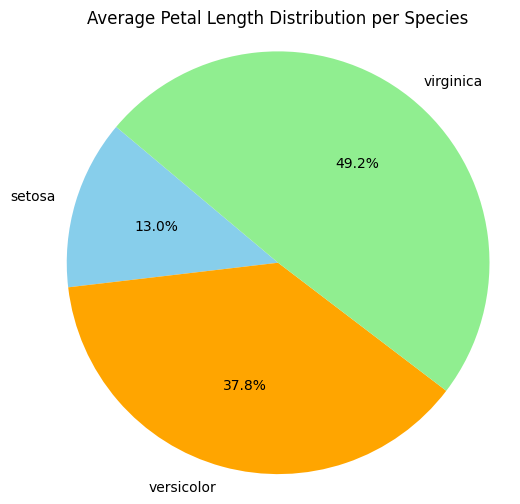

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Calculate average petal length per species
avg_petal_length = df.groupby('species')['petal length (cm)'].mean()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(avg_petal_length.values, labels=avg_petal_length.index,
        autopct='%1.1f%%', startangle=140,
        colors=['skyblue', 'orange', 'lightgreen'])

plt.title('Average Petal Length Distribution per Species')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


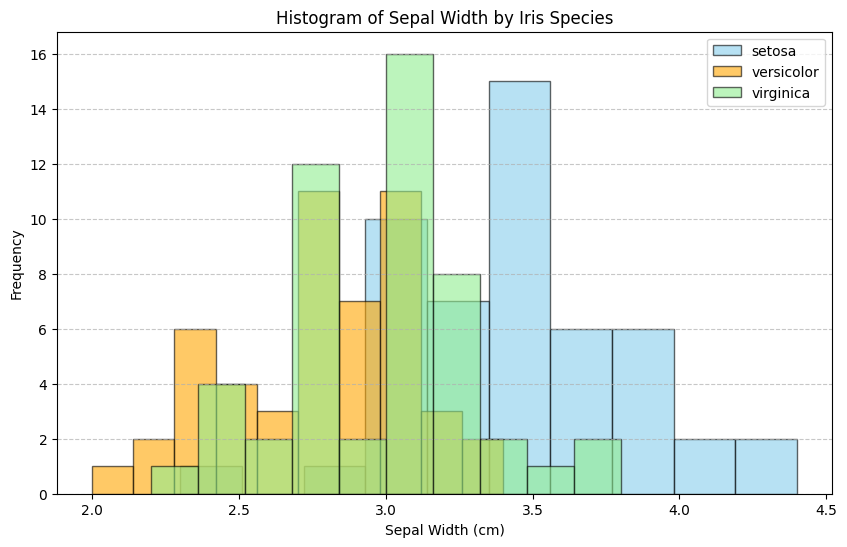

In [ ]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot histogram of sepal width grouped by species
plt.figure(figsize=(10, 6))

species = ['setosa', 'versicolor', 'virginica']
colors = ['skyblue', 'orange', 'lightgreen']

for i, sp in enumerate(species):
    subset = data[data['species'] == sp]
    plt.hist(subset['sepal width (cm)'], bins=10, alpha=0.6, label=sp, color=colors[i], edgecolor='black')

plt.title('Histogram of Sepal Width by Iris Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

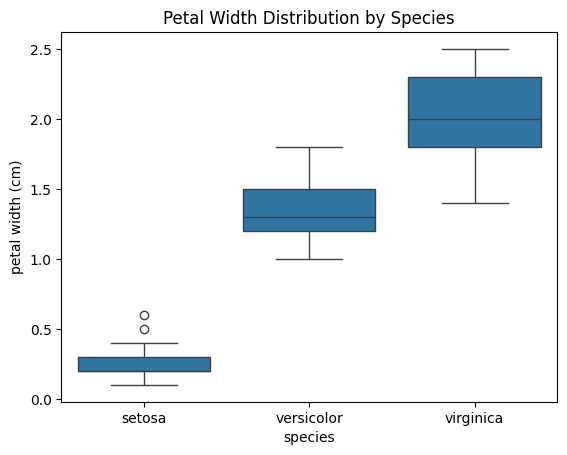

In [ ]:
import seaborn as sns
sns.boxplot(x='species', y='petal width (cm)', data=data)
plt.title('Petal Width Distribution by Species')
plt.show()


Data preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('species', axis=1)
y = data['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train logistic regression model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

